# Code

In [1]:
!pip install midiutil
!pip install pygame
!pip install pretty_midi

In [2]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from midiutil import MIDIFile

pygame 2.0.1 (SDL 2.0.14, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") 
dataMETA = pd.read_csv("data/plasticc_train_metadata.csv.gz")

In [4]:
def plotObject(objectID, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    time = obj["mjd"]
    flux = obj["flux"]

    plt.plot(time, flux, 'o', color = "black")
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [5]:
def multiPlotObject(objectID, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]

    objData = data["object_id"].isin([objectID])
    obj = data[objData]

    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])

    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [6]:
def sonification(objectID):

    FEObj = pd.DataFrame()
    
    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    time = obj["mjd"]
    flux = obj["flux"]


    x_points = time
    y_points = flux
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    FEObj = obj
    sonify.play_midi_from_data(normed_data, track_type='single', key='c_major',df=FEObj)



In [7]:
def multiSonification(objectID):
    multiData = []

    FEObj = pd.DataFrame()
    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=30)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=30)
        quantized_x = sonify.quantize_x_value(scaled_x)

        multiData.append(list(zip(quantized_x, scaled_y)))
    
    instruments_to_add = [
    'steel drums', 'rock organ', 'pizzicato strings', 'oboe', 'ocarina','violin'
    ]
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    

    FEObj = obj
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', key='c_major', df=FEObj)

# Plots and Sonification

In [ ]:
plotObject(5515915)

In [ ]:
sonification(5515915)

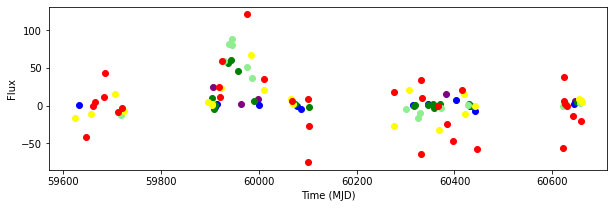

In [8]:
multiPlotObject(5515915)

In [9]:
multiSonification(5515915)

Volume: 85 ,  Flux Err: 10.206571
Volume: 89 ,  Flux Err: 8.235168
Volume: 92 ,  Flux Err: 6.166819
Volume: 86 ,  Flux Err: 9.49455
Volume: 92 ,  Flux Err: 5.973655
Volume: 95 ,  Flux Err: 4.354834
Volume: 99 ,  Flux Err: 2.287193
Volume: 97 ,  Flux Err: 3.380521
Volume: 100 ,  Flux Err: 1.435536
Volume: 96 ,  Flux Err: 3.590598
Volume: 98 ,  Flux Err: 2.720978
Volume: 98 ,  Flux Err: 2.73497
Volume: 99 ,  Flux Err: 2.06447
Volume: 94 ,  Flux Err: 4.889116
Volume: 98 ,  Flux Err: 2.410505
Volume: 94 ,  Flux Err: 4.988728
Volume: 99 ,  Flux Err: 2.228992
Volume: 90 ,  Flux Err: 7.10557
Volume: 95 ,  Flux Err: 4.321931
Volume: 97 ,  Flux Err: 3.129865
Volume: 97 ,  Flux Err: 3.172368
Volume: 96 ,  Flux Err: 3.615151
Volume: 98 ,  Flux Err: 2.918588
Volume: 97 ,  Flux Err: 3.186694
Volume: 94 ,  Flux Err: 4.843113
Volume: 93 ,  Flux Err: 5.594133
Volume: 97 ,  Flux Err: 3.362095
Volume: 98 ,  Flux Err: 2.491624
Volume: 95 ,  Flux Err: 4.412128
Volume: 97 ,  Flux Err: 3.003806
Volume: 97 ,

----

In [ ]:
plotObject(287556)

In [ ]:
sonification(287556)

In [ ]:
multiPlotObject(287556)

In [ ]:
multiSonification(287556)